In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Sequential

In [2]:
def loadData():
    file = open('/content/drive/MyDrive/Colab Notebooks/vn_food.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [3]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(3000, 128, 128, 3)
(3000, 10)


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=50, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/50
38/38 [==============================] - 27s 394ms/step - loss: 4.1838 - accuracy: 0.1025 - val_loss: 2.2967 - val_accuracy: 0.1150
Epoch 2/50
38/38 [==============================] - 13s 354ms/step - loss: 2.2909 - accuracy: 0.1225 - val_loss: 2.3049 - val_accuracy: 0.0983
Epoch 3/50
38/38 [==============================] - 13s 349ms/step - loss: 2.3030 - accuracy: 0.0950 - val_loss: 2.3045 - val_accuracy: 0.0900
Epoch 4/50
38/38 [==============================] - 15s 399ms/step - loss: 2.3030 - accuracy: 0.1025 - val_loss: 2.3044 - val_accuracy: 0.0900
Epoch 5/50
38/38 [==============================] - 13s 350ms/step - loss: 2.3028 - accuracy: 0.0950 - val_loss: 2.3040 - val_accuracy: 0.0917
Epoch 6/50
38/38 [==============================] - 13s 349ms/step - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3047 - val_accuracy: 0.0900
Epoch 7/50
38/38 [==============================] - 13s 346ms/step - loss: 2.3027 - accuracy: 0.0913 - val_loss: 2.3045 - val_accuracy: 0.0900

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 95.9284
Test accuracy 0.2017


In [8]:
model.save('Final.h5')

In [9]:
from keras.models import load_model
model5=load_model('Final.h5')

In [10]:
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

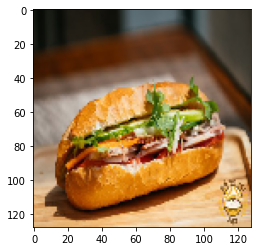

In [53]:
img = load_img('/content/banhmiVN.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [54]:
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [55]:
class_name = ['BanhMi','BanhXeo','BunCha','ChaLua','ChaoLong','ComTam','GoiCuon','HuTieu','NemChua','Pho']

In [56]:
model_5 = load_model('Final.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('BanhMi', array([0.14849937, 0.11816517, 0.11142156, 0.09496772, 0.048076  ,
        0.08521712, 0.11148743, 0.09293777, 0.09599295, 0.09323496],
       dtype=float32))